In [1]:
import numpy as np

import pandas as pd
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import time

In [2]:
pathToDataFile = 'ex1data1.txt'

# 1 Data Visualisation

In [3]:
dataFrame = pd.read_csv(pathToDataFile, header = None)
sampleSize, numVariables = dataFrame.shape
print ('sampleSize =', sampleSize, 'numVariables =', numVariables)
print (dataFrame.head())

sampleSize = 97 numVariables = 2
        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


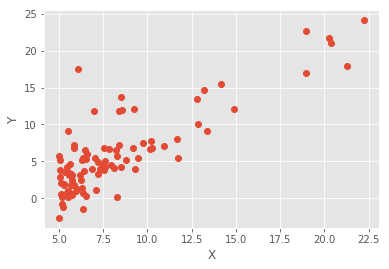

In [4]:
Xs = dataFrame.iloc[:, :1]
Ys = dataFrame.iloc[:, 1:2]
plt.plot(Xs, Ys, 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 2 Loading Data

In [5]:
def getData(pathToDataFile):
    data = np.loadtxt(pathToDataFile, delimiter = ',')
    sampleSize, numVariables = data.shape
#     matrix of variables X(n, k), where n is sampleSize, and k is numVariables, including the intercept
    X = np.insert(data[:, :-1], 0, 1, axis=1)
#     vector of response y(n, 1), where n is sampleSize
    y = data[:, -1:]
#     vector of coefficients beta(k, 1), where k is numVariables, including the intercept
    beta = np.zeros((numVariables,1))
    return beta, X, y

In [6]:
beta, X, y = getData(pathToDataFile)

# 3 Linear Regression

## 3.1 Computing Parameters Analytically
**Coefficient Matrix** can be calculated as follows 
$$\beta = (X^T\cdot X)^{-1}\cdot X^T\cdot y$$

**X** is a matrix of variables with a first column of dummy variables as intercept (column of ones).
**y** is a vector of responses.
$\theta$ is a vector of coefficients in the linear regression model.

In [7]:
# Computing Parameters Analytically
def linearRegression_analytical(X, y):
#     beta vector (2, 1), vector of coefficients
    beta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
    return beta

## 3.2 Computing Parameters Using Gradient Descent & Linear Algebra

### Vector Representation of the Regression Problem
Variables matrix X:
\begin{equation*}
X =
\begin{vmatrix}
x_{1,1} & \ldots & x_{1,j} \\
\ldots & \ldots & \ldots \\
x_{n,1} & \ldots & x_{n,j}\\
\end{vmatrix}
\end{equation*}

Variables marix X, after adding a column of ones as intercepts:
\begin{equation*}
X =
\begin{vmatrix}
1 & x_{1,1} & \ldots & x_{1,k} \\
1 & \ldots & \ldots & \ldots \\
1 & x_{n,1}& \ldots & x_{n,k}\\
\end{vmatrix}
\end{equation*}

Response vector Y:
\begin{equation*}
Y =
\begin{vmatrix}
y_1\\
\ldots\\
y_n\\
\end{vmatrix}
\end{equation*}

Coefficients vector $\beta$:
\begin{equation*}
\beta =
\begin{vmatrix}
\beta_1\\
\ldots\\
\beta_k\\
\end{vmatrix}
\end{equation*}

**Hypothesis** $H_{\beta}(X) =  X\cdot\beta$

**Error** $E = (H_{\beta}(X) - Y)$

**Cost Function** $J = \frac{\sum(H_{\beta} - Y)^{2}}{2N}$

**Gradient** $G = X^{T}\cdot E$


In [8]:
def hypothesis(beta, X):
#     return hypothesis vector h(n, 1), where n is sampleSize
    return np.dot(X, beta)

def costFunction(beta, X, y):
    sampleSize, numVariables = X.shape
#     hypothesis vector h(n, 1)
    h = hypothesis(beta, X)
#     cost scalar J(1, 1) = (y-h).T, y-h)/(2*n), where n is sampleSize
    J = np.sum((y-h)**2)/(2*sampleSize)
#     similarly cost J can be calculated using dot-product
#     J(1, 1) = (y-h).T, y-h)/(2*n), where n is sampleSize
#     technically the result is an array (1,1) rather than a float
#     J = np.dot((y-h).T, y-h)/(2*sampleSize)
    return J

def gradientDescent(beta, X, y, alpha, iterations):
    sampleSize, numVariables = X.shape
    J_history = []
    for i in range(iterations):
#         hypothesis vector h(n, 1)
        h = hypothesis(beta, X)
#         error vector e(n, 1)
        e = h - y
#         cost scalar J
        J = costFunction(beta, X, y)
#         gradient vector g(k, 1)
        g = np.dot(X.T, e)
#         updated beta vector beta(k, 1)
        beta = beta - alpha*g/(sampleSize)
#         updated J_history
        J_history += [J] 
    return beta, J_history

# 4 Results Visulisation & Analysis

In [9]:
def plotRegression(beta, X, y):  
#     yFit = betaFit[0][0] + betaFit[1][0]*X[:,1:]
    yFit = np.dot(X,betaFit)
    
    MSE = np.sum((y - yFit)**2)/y.shape[0]
    
    plt.plot(X[:,1:], y, 'o', X[:,1:], yFit, '-')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    print ('β_0: ', betaFit[0][0],
           '\nβ_1: ', betaFit[1][0],
           '\nRegression: Y =', '{:10.2f}'.format(betaFit[0][0]), '+', '{:10.2f}'.format(betaFit[1][0]), 'X'
           '\nMSE =','{:10.2f}'.format(MSE))
    return plt.show()

def plotConvergence(J_history, iterations):
    plt.plot(np.arange(1, iterations + 1), J_history, '-')
    plt.xlabel('iterations')
    plt.ylabel('J (cost)')
    plt.show()

## 4.1 Analytical Approach

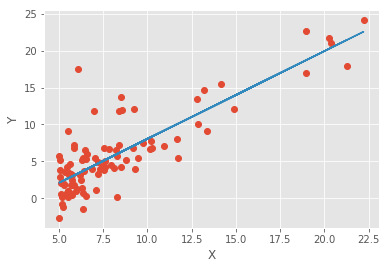

β_0:  -3.89578087831 
β_1:  1.19303364419 
Regression: Y =      -3.90 +       1.19 X
MSE =       8.95


In [10]:
betaFit = linearRegression_analytical(X, y)

plotRegression(betaFit, X, y)

## 4.2 Gradient-Descent Approach

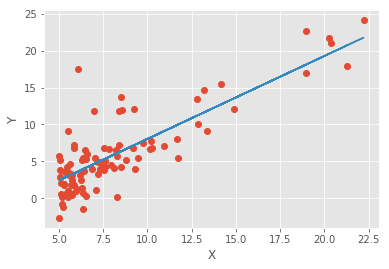

β_0:  -3.24140214427 
β_1:  1.12729420243 
Regression: Y =      -3.24 +       1.13 X
MSE =       9.03


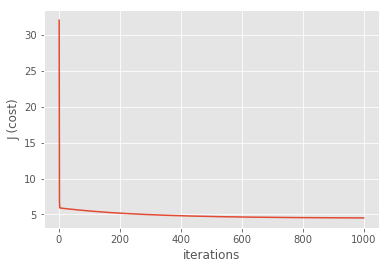

In [11]:
alpha = 0.01
iterations = 1000

betaFit = gradientDescent(beta, X, y, alpha, iterations)[0]
plotRegression(betaFit, X, y)
costVector = gradientDescent(beta, X, y, alpha, iterations)[1]
plotConvergence(costVector, iterations)

# Using Pandas

### Import data via pd.read_csv

In [12]:
pathToDataFile = 'ex1data1.txt'

dataFrame = pd.read_csv(pathToDataFile, header = None, names = ['x', 'y'])
nRows, nColumns = dataFrame.shape
X = dataFrame['x']
Y = dataFrame['y']

# plt.plot(X, Y, 'o', ms = 5)
# plt.xlabel('City Population (10 000)')
# plt.ylabel('Profit ($10 000)')
# plt.show()
# print('Sample Size:', dataFrame.shape[0])

<class 'pandas.core.frame.DataFrame'>
(97, 2)
[[-3.89578088]
 [ 1.19303364]]


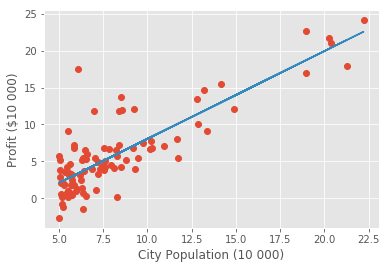

θ_0:  -3.89578087831 
θ_1:  1.19303364419 
Fit: Y =     -3.90 +       1.19 X


In [13]:
# Computing Parameters Analytically

variablesMatrix = dataFrame.loc[:, 'x':'x']
variablesMatrix.insert(0, 'dummy_1', 1)
responseVector = dataFrame.loc[:, 'y':'y']
#print (variablesMatrix)
print (type(variablesMatrix))
print (variablesMatrix.shape)

coefficientMatrix = np.dot(np.dot(np.linalg.inv(np.dot(variablesMatrix.T, variablesMatrix)), variablesMatrix.T), responseVector)
print (coefficientMatrix)

fitX = np.arange(5.0, 22.5, 0.5,)
fitY = coefficientMatrix[0] + coefficientMatrix[1]*X

plt.plot(X, Y, 'o', X, fitY, '-')
plt.xlabel('City Population (10 000)')
plt.ylabel('Profit ($10 000)')
plt.show()

print ('θ_0: ', coefficientMatrix[0][0],
       '\nθ_1: ', coefficientMatrix[1][0],
      '\nFit: Y =' '{:10.2f}'.format(coefficientMatrix[0][0]), '+', '{:10.2f}'.format(coefficientMatrix[1][0]), 'X')

https://codereview.stackexchange.com/questions/171144/gradient-descent-for-linear-regression-using-numpy-pandas

In [14]:
def getData (pathToDataFile):
    dataFrame = pd.read_csv(pathToDataFile, header = None)
    sampleSize, numVariables = dataFrame.shape
    variables = dataFrame.iloc[:, :-1]
    variables.insert(0, 'intercept', 1)
    response = dataFrame.iloc[:, -1:]
    coefficients = pd.DataFrame(np.ones((variables.shape[1],1)))
    
    return variables, response, coefficients

def costFunction(variables, response, coefficients):
    """
    costFunciton(variables, response, coefficients) computes the cost of using coefficients as the
    parameter for linear regression to fit the data points
    """
    sampleSize, numVariables = variables.shape
    costFunction = ((np.sum((response-np.dot(variables, coefficients))**2))/(2*sampleSize))
    return costFunction.values[0]

def gradientDescent(variables, response, learningRate, iterations):
    sampleSize, numVariables = variables.shape
    coefficients = pd.DataFrame(np.zeros((numVariables,1)))
    costVector = []
    for i in range(iterations):
        hypothesis = np.dot(variables, coefficients)
        error = hypothesis - response
        cost = costFunction(variables, response, coefficients)
        gradient = np.dot(variables.T, error)
        coefficients = coefficients - learningRate*gradient/(sampleSize)
        costVector += [cost]
    
    return coefficients, costVector

def plotRegression(variables, response, coefficients):
    Xs = variables.iloc[:, 1:]
    Ys = response.iloc[:, 0:]
    fitYs = coefficients[0][0] + coefficients[0][1]*Xs
    plt.plot(Xs, Ys, 'o', Xs, fitYs, '-')
    plt.xlabel('X')
    plt.ylabel('Y')
    
    print ('β_0: ', coefficients[0][0],
           '\nβ_1: ', coefficients[0][1],
           '\nRegression: Y =' '{:10.2f}'.format(coefficients[0][0]), '+', '{:10.2f}'.format(coefficients[0][1]), 'X')
    return plt.show()

    
def plotCostFunctionVSiterations(costVector, iterations):
    plt.plot(np.arange(1, iterations + 1), costVector, '-')
    plt.xlabel('iterations')
    plt.ylabel('cost (J)')
    plt.show()

β_0:  -3.6302914394 
β_1:  1.16636235034 
Regression: Y =     -3.63 +       1.17 X


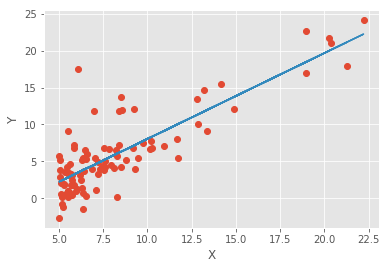

In [15]:
pathToDataFile = 'ex1data1.txt'

iterations = 1500
learningRate = 0.01

variables, response, coefficients = getData (pathToDataFile)
coefficients, costVector = gradientDescent(variables, response, learningRate, iterations)

plotRegression(variables, response, coefficients)
# for learningRate in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
#     coefficients, costVector = gradientDescent(variables, response, learningRate, iterations)
#     print ('Learning Rate =', str(learningRate),'\nJ =', '{:10.2f}'.format(costVector[-1]))
#     plotCostFunctionVSiterations(costVector, iterations)


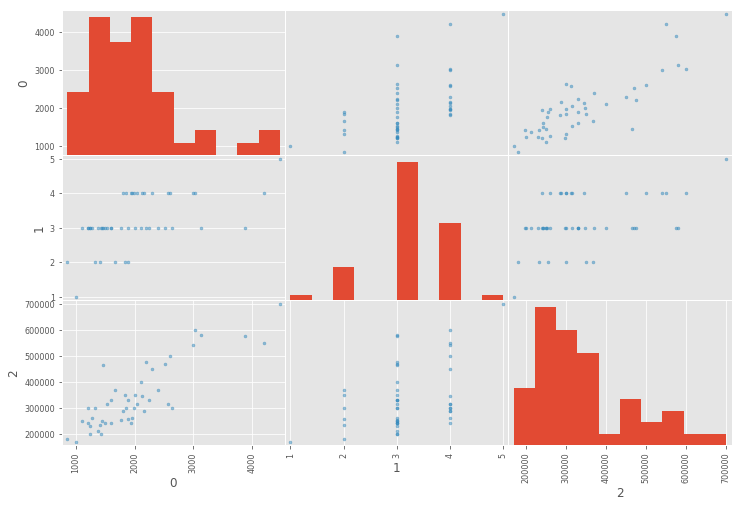

In [16]:
pathToDataFile = 'ex1data2.txt'
variables_2, response_2, coefficients_2 = getData (pathToDataFile)

gradientDescent(variables_2, response_2, 0.01, 1000)
dataFrame_2 = pd.read_csv(pathToDataFile, header = None)
scatter_matrix(dataFrame_2, figsize = (12, 8))
plt.show()

In [17]:
df = pd.DataFrame({'a' : [4,1,3], 'b' : [5,2,4]},index=[1,2,3])
df

,a,b
1,4,5
2,1,2
3,3,4


In [18]:
s = pd.Series([0.6,0.4],index=['a','b'])
s.shape

(2,)

In [19]:
df.dot(s)

1    4.4
2    1.4
3    3.4
dtype: float64